# Lead Score - Case Study

## Problem Statement

X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals and Objectives

There are quite a few goals for this case study.

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #surpress warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/Users/saisharan/Downloads/Lead Scoring Assignment/Leads.csv')

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.shape

(9240, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.Converted.value_counts('Normalise')

0    0.61461
1    0.38539
Name: Converted, dtype: float64

#### The data seems to be balanced.

##### Let's find the null values in the dataframe

In [7]:
round(((df.isnull().sum()/9240)*100),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

##### Lets drop the coloums whose missing values are more than 35%

In [8]:
df.drop('Lead Quality', axis=1, inplace=True)

In [9]:
df.drop(['Tags','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], axis=1, inplace=True)

In [10]:
df.shape

(9240, 31)

We had dropped all the colums whose missing values are more than 35%

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [12]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

Let's drop the colums whose unique values = 1 as there no value these colums can add to our analysis. 

In [13]:
df.drop(['I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses','Magazine'],axis=1,inplace=True)

In [14]:
df.shape

(9240, 26)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [16]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,Select,Select,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,Select,Select,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,Potential Lead,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,Select,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,Select,Mumbai,No,Modified


    As we have prospect ID & the lead number as unique row identifiers. One unique identifier should be enough for analysis. As prospect ID is alpha numeric, we can drop that column. 
    

In [17]:
df.drop('Prospect ID', axis=1,inplace=True)

df.drop('Prospect ID', axis=1,inplace=True)

In [18]:
df.shape

(9240, 25)

In [19]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,No,No,No,No,No,No,Select,Select,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,No,No,No,No,No,No,Select,Select,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,No,No,No,No,No,No,Potential Lead,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,No,No,No,No,No,No,Select,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,No,No,No,No,No,No,Select,Mumbai,No,Modified


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [21]:
round(((df.isnull().sum()/9240)*100),2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [22]:
df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [23]:
df['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [24]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [25]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [26]:
df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [27]:
df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

    The columns like specialization, How did you hear about X Education, Lead Profile, & City has a catagory called select. This catagory has no value addition. We can treat this as null value. Let's replace it with NaN.

In [28]:
df.replace('Select', np.nan,inplace=True)

In [29]:
round(((df.isnull().sum()/9240)*100),2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

    lets drop the columns whose missing values are more than 35%
   

In [30]:
df.drop(['City','Lead Profile','How did you hear about X Education','Specialization'],axis=1,inplace=True)

In [31]:
df.shape

(9240, 21)

In [32]:
round(((df.isnull().sum()/9240)*100),2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

As the columns Country, 'What is your current occupation', & 'What matters most to you in choosing a course' are less than 35% of missing values but still the values missing are significant in numbers. If we drop this colums we will loose significant amount of data which will afttect our analysis. 

Instead of dropping them let's replace the null values with 'not given' - string. With the country - Let us do the same and make it india and out of india to restrict our analysis to indian region. This is because 70% of the data is from India and rest data is not significant from any other country. 

In [33]:
df['What is your current occupation'] = df['What is your current occupation'].fillna('not given')

In [34]:
round(((df.isnull().sum()/9240)*100),2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [35]:
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('not given')

In [36]:
## let us treat the country coloumn. 

df.Country = df.Country.fillna('not given')

In [37]:
df.Country.value_counts()

India                   6492
not given               2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [38]:
for i in range(0,9240):
    if df.Country[i]!='India':
        df.Country[i] = 'Out of india'  
        

In [39]:
df.Country.value_counts('Normalize')

India           0.702597
Out of india    0.297403
Name: Country, dtype: float64

In [40]:
df.shape

(9240, 21)

In [41]:
round(((df.isnull().sum()/9240)*100),2)

Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [42]:
df.dropna(axis=0,inplace=True)

In [43]:
round(((df.isnull().sum()/9240)*100),2)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [44]:
df.shape

(9074, 21)

In [45]:
## Data loss calculation

(9074/9240)*100

98.2034632034632

    We have lost around 1.8% of the data which is not very significant. As the data is clean and clear. Let us start with EDA.

# EDA

- Univariate Analysis

In [46]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [47]:
df.shape

(9074, 21)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

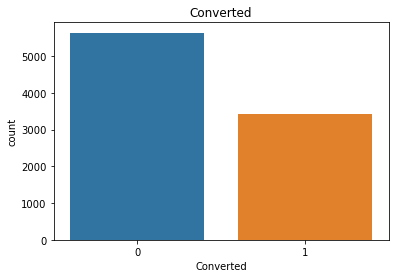

In [49]:
sns.countplot(df.Converted)
plt.title('Converted')
plt.show()

##### The target variable seems very well balanced. 

- Let us plot the categorical variables to understand the varience of the data

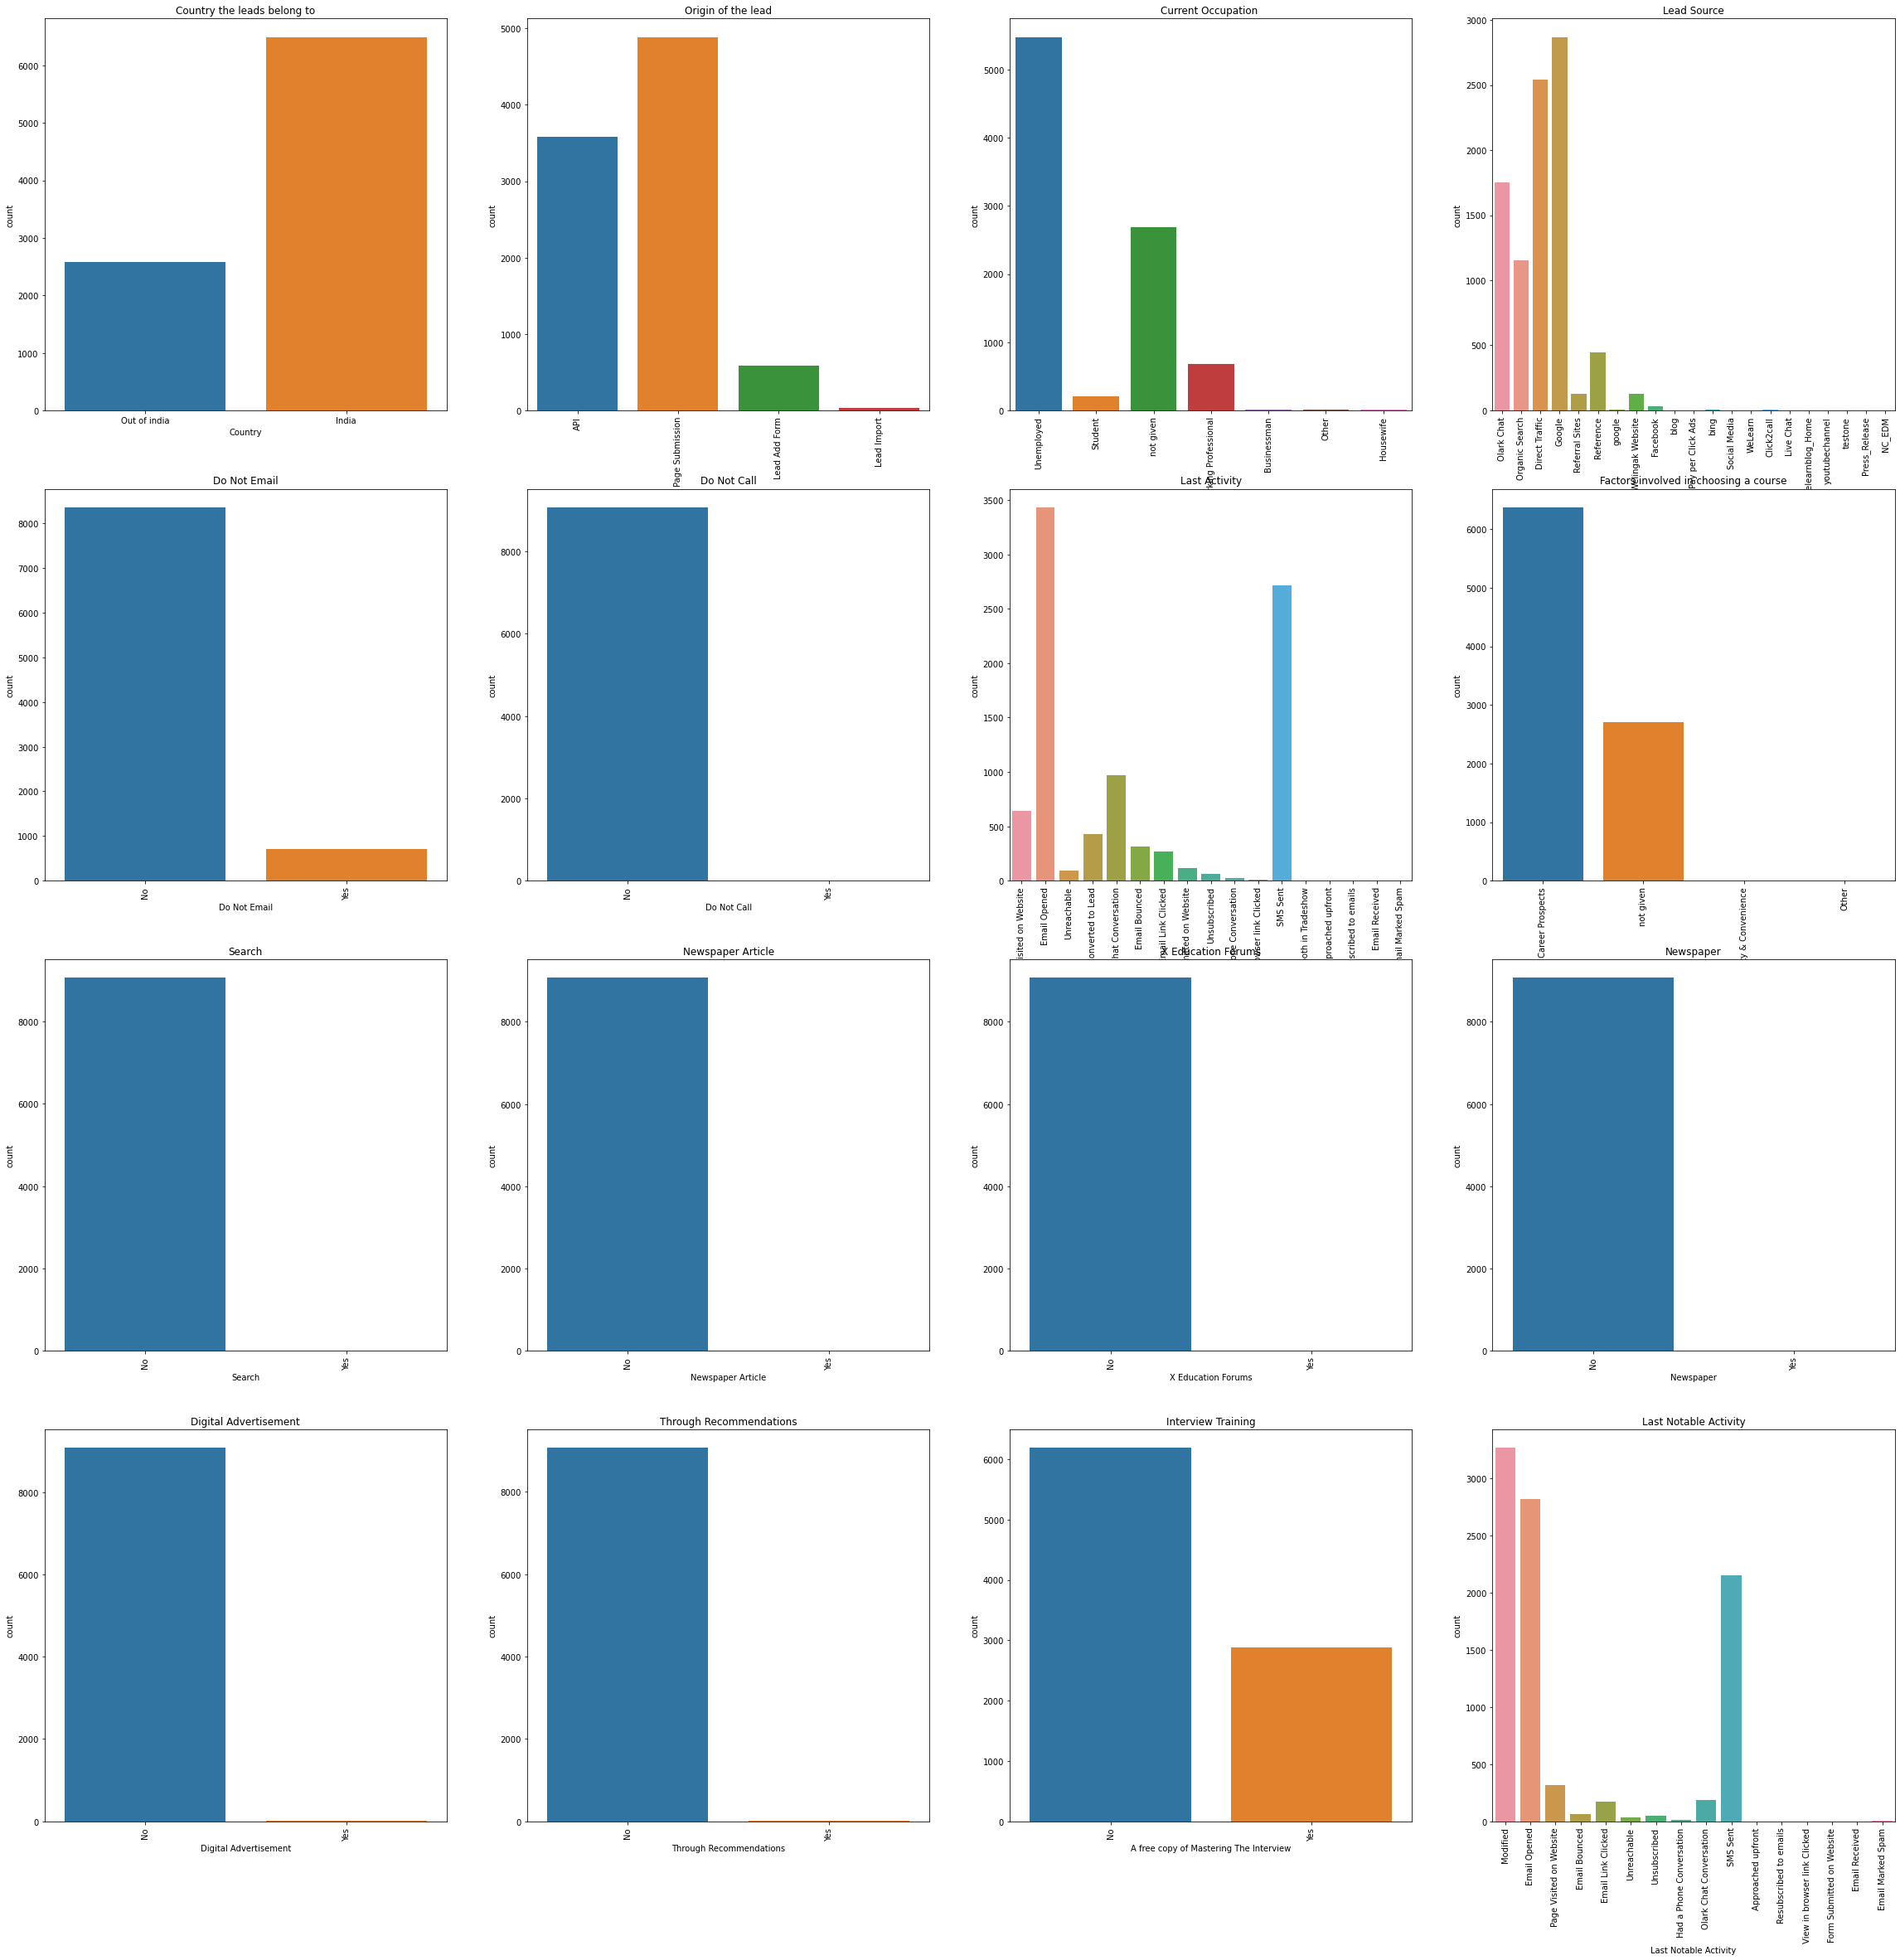

In [50]:
plt.figure(figsize = (40,40))

plt.subplot(4,4,1)

sns.countplot(df.Country)
plt.title('Country the leads belong to')


plt.subplot(4,4,2)

sns.countplot(df['Lead Origin']).tick_params(axis='x',rotation=90)
plt.title('Origin of the lead')

plt.subplot(4,4,3)

sns.countplot(df['What is your current occupation']).tick_params(axis='x',rotation=90)
plt.title('Current Occupation ')



plt.subplot(4,4,4)

sns.countplot(df['Lead Source']).tick_params(axis='x',rotation=90)
plt.title('Lead Source')



plt.subplot(4,4,5)
sns.countplot(df['Do Not Email']).tick_params(axis='x',rotation=90)
plt.title('Do Not Email')



plt.subplot(4,4,6)
sns.countplot(df['Do Not Call']).tick_params(axis='x',rotation=90)
plt.title('Do Not Call')



plt.subplot(4,4,7)
sns.countplot(df['Last Activity']).tick_params(axis='x',rotation=90)
plt.title('Last Activity')

plt.subplot(4,4,8)
sns.countplot(df['What matters most to you in choosing a course']).tick_params(axis='x',rotation=90)
plt.title('Factors involved in choosing a course')

plt.subplot(4,4,9)
sns.countplot(df['Search']).tick_params(axis='x',rotation=90)
plt.title('Search')

plt.subplot(4,4,10)
sns.countplot(df['Newspaper Article']).tick_params(axis='x',rotation=90)
plt.title('Newspaper Article')

plt.subplot(4,4,11)
sns.countplot(df['X Education Forums']).tick_params(axis='x',rotation=90)
plt.title('X Education Forums')

plt.subplot(4,4,12)
sns.countplot(df['Newspaper']).tick_params(axis='x',rotation=90)
plt.title('Newspaper')

plt.subplot(4,4,13)
sns.countplot(df['Digital Advertisement']).tick_params(axis='x',rotation=90)
plt.title('Digital Advertisement')

plt.subplot(4,4,14)
sns.countplot(df['Through Recommendations']).tick_params(axis='x',rotation=90)
plt.title('Through Recommendations')

plt.subplot(4,4,15)
sns.countplot(df['A free copy of Mastering The Interview']).tick_params(axis='x',rotation=90)
plt.title('Interview Training')

plt.subplot(4,4,16)
sns.countplot(df['Last Notable Activity']).tick_params(axis='x',rotation=90)
plt.title('Last Notable Activity')

plt.show()

    - From the above, you can find that the columns like 'Do not call','Search', 'Newspaper Article', 'X Edication Forums', 'Newspaper','Digital Advertisement' & 'Thought Recommendations', a total 7 colums seems like no varience atall. They will clearly not contribute much to analysis & model.

- Let us plot the Numerical variables to understand the varience of the data

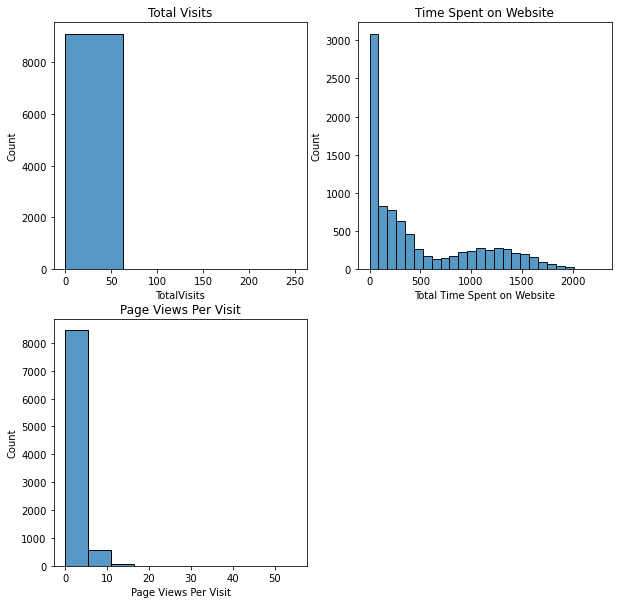

In [51]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)

sns.histplot(df['TotalVisits'], bins=4)
plt.title('Total Visits')

plt.subplot(2,2,2)

sns.histplot(df['Total Time Spent on Website'])
plt.title('Time Spent on Website')

plt.subplot(2,2,3)

sns.histplot(df['Page Views Per Visit'],bins=10)
plt.title('Page Views Per Visit')

plt.show()

    - The above data seems fine. The data has some knid of varience. 

- Bivariate Analysis

    - Lets do the bivariate analysis with all the variables Vs. Target variable.

 Numerical Variable Vs Target variable

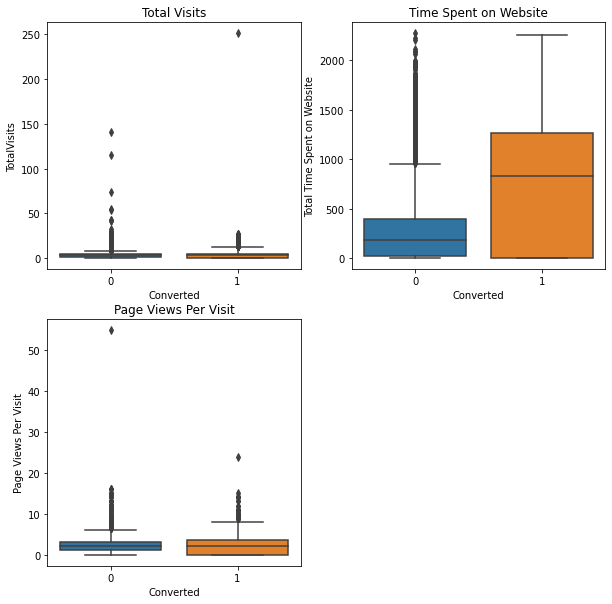

In [52]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)

sns.boxplot(df.Converted, df['TotalVisits'])
plt.title('Total Visits')

plt.subplot(2,2,2)

sns.boxplot(df.Converted, df['Total Time Spent on Website'])
plt.title('Time Spent on Website')

plt.subplot(2,2,3)

sns.boxplot(df.Converted, df['Page Views Per Visit'])
plt.title('Page Views Per Visit')

plt.show()

 Categorical Variable Vs Target variable

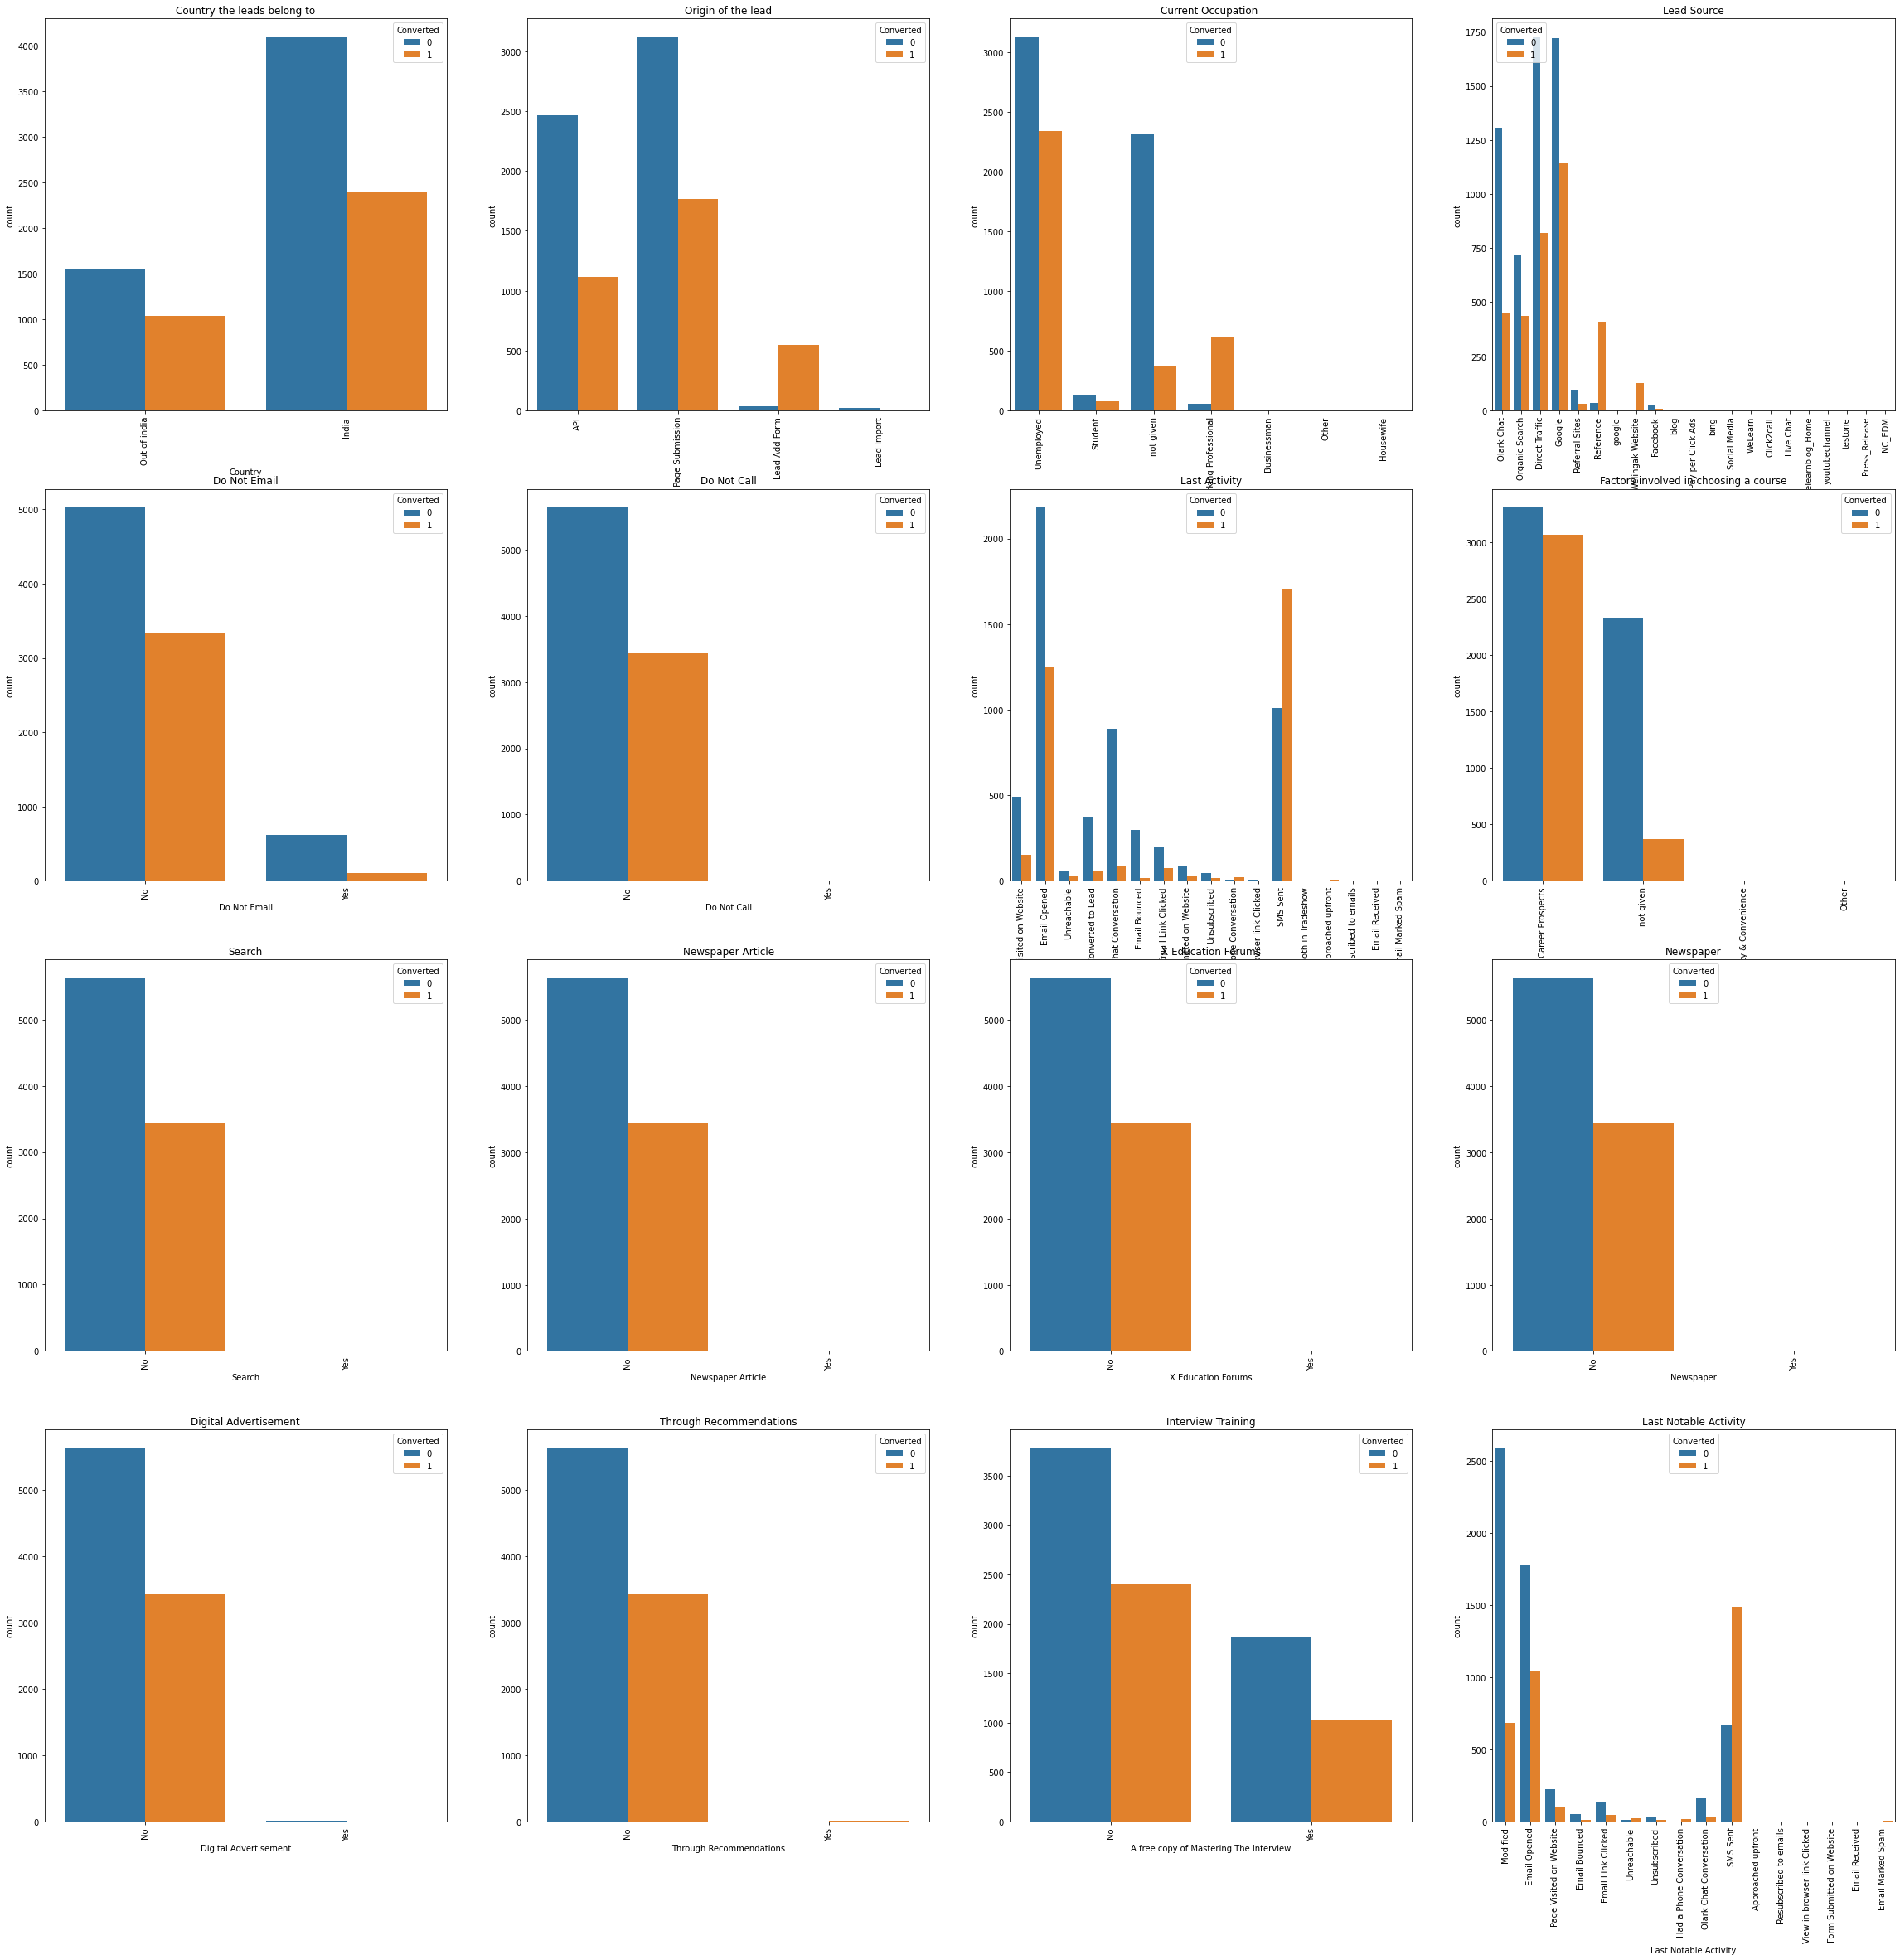

In [53]:
plt.figure(figsize = (40,40))



#plt.subplot(1,2,1)
#sns.countplot(x='Through Recommendations', hue='Converted', data= df_final).tick_params(axis='x', rotation = 90)
#plt.title('Through Recommendations')






plt.subplot(4,4,1)

sns.countplot(x='Country', hue='Converted', data=df).tick_params(axis='x',rotation=90)
plt.title('Country the leads belong to')


plt.subplot(4,4,2)

sns.countplot(x='Lead Origin',hue='Converted', data=df).tick_params(axis='x',rotation=90)
plt.title('Origin of the lead')

plt.subplot(4,4,3)

sns.countplot(x='What is your current occupation',hue='Converted', data=df).tick_params(axis='x',rotation=90)
plt.title('Current Occupation ')



plt.subplot(4,4,4)

sns.countplot(x='Lead Source',hue='Converted', data=df).tick_params(axis='x',rotation=90)
plt.title('Lead Source')



plt.subplot(4,4,5)
sns.countplot(x='Do Not Email',hue='Converted', data=df).tick_params(axis='x',rotation=90)
plt.title('Do Not Email')



plt.subplot(4,4,6)
sns.countplot(x='Do Not Call',hue='Converted', data=df).tick_params(axis='x',rotation=90)
plt.title('Do Not Call')



plt.subplot(4,4,7)
sns.countplot(x='Last Activity',hue='Converted', data=df).tick_params(axis='x',rotation=90)
plt.title('Last Activity')

plt.subplot(4,4,8)
sns.countplot(x='What matters most to you in choosing a course',hue='Converted', data=df).tick_params(axis='x',rotation=90)
plt.title('Factors involved in choosing a course')

plt.subplot(4,4,9)
sns.countplot(x='Search',hue='Converted', data=df).tick_params(axis='x',rotation=90)
plt.title('Search')

plt.subplot(4,4,10)
sns.countplot(x='Newspaper Article',hue='Converted', data=df).tick_params(axis='x',rotation=90)
plt.title('Newspaper Article')

plt.subplot(4,4,11)
sns.countplot(x='X Education Forums',hue='Converted', data=df).tick_params(axis='x',rotation=90)
plt.title('X Education Forums')

plt.subplot(4,4,12)
sns.countplot(x='Newspaper',hue='Converted', data=df).tick_params(axis='x',rotation=90)
plt.title('Newspaper')

plt.subplot(4,4,13)
sns.countplot(x='Digital Advertisement',hue='Converted', data=df).tick_params(axis='x',rotation=90)
plt.title('Digital Advertisement')

plt.subplot(4,4,14)
sns.countplot(x='Through Recommendations',hue='Converted', data=df).tick_params(axis='x',rotation=90)
plt.title('Through Recommendations')

plt.subplot(4,4,15)
sns.countplot(x='A free copy of Mastering The Interview',hue='Converted', data=df).tick_params(axis='x',rotation=90)
plt.title('Interview Training')

plt.subplot(4,4,16)
sns.countplot(x='Last Notable Activity',hue='Converted', data=df).tick_params(axis='x',rotation=90)
plt.title('Last Notable Activity')

plt.show()

    - We can clearly see that their is enough varience among the converted & non-converted leads with the data. 

- Multivariate Analysis

df_corr=df['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity']

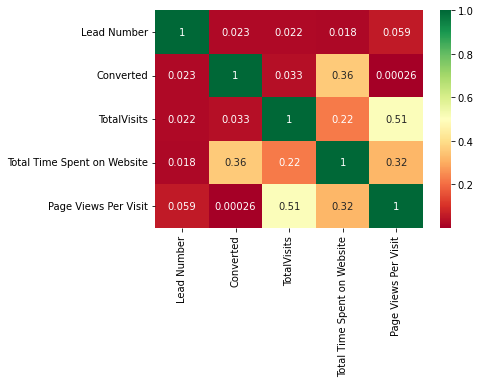

In [54]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.show()

    - From above we can see that there is good corrolation b/w total visits Vs Time spent on website AND Time spent on wesite Vs Converted. 

### Data processing for Modelling

- Creating Dummies

In [55]:
object_columns = df.select_dtypes(include=['object']).columns

In [56]:
len(object_columns)

16

In [57]:
object_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [58]:
df_dummies=df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity']]

In [59]:
df_dummies= pd.get_dummies(df_dummies, drop_first=True)
df_dummies.shape

(9074, 73)

In [60]:
df_model=pd.concat([df,df_dummies], axis=1)
df_model.shape

(9074, 94)

In [61]:
df_model.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1, inplace=True)
df_model.shape

(9074, 78)

- Train/Test split

In [62]:
# Import the required library
from sklearn.model_selection import train_test_split

In [63]:
X=df_model.drop(['Converted'], axis=1)
X.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,1.0,305,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [64]:
y=df_model['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=45) 

    - Scaling of the features using min-max scaler

In [66]:
#min-max scaler
from sklearn.preprocessing import MinMaxScaler

In [67]:
scaler=MinMaxScaler()

In [68]:
X_train[['Lead Number','TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['Lead Number','TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [69]:
X_train[['Lead Number','TotalVisits','Total Time Spent on Website','Page Views Per Visit']].head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit
7724,0.136380,0.031873,0.027639,0.072727
6670,0.236124,0.019920,0.027186,0.090909
3248,0.608555,0.007968,0.835523,0.036364
8902,0.031560,0.003984,0.035342,0.018182
7268,0.175642,0.019920,0.660172,0.030364


In [70]:
y_train.head()

7724    0
6670    0
3248    1
8902    1
7268    1
Name: Converted, dtype: int64

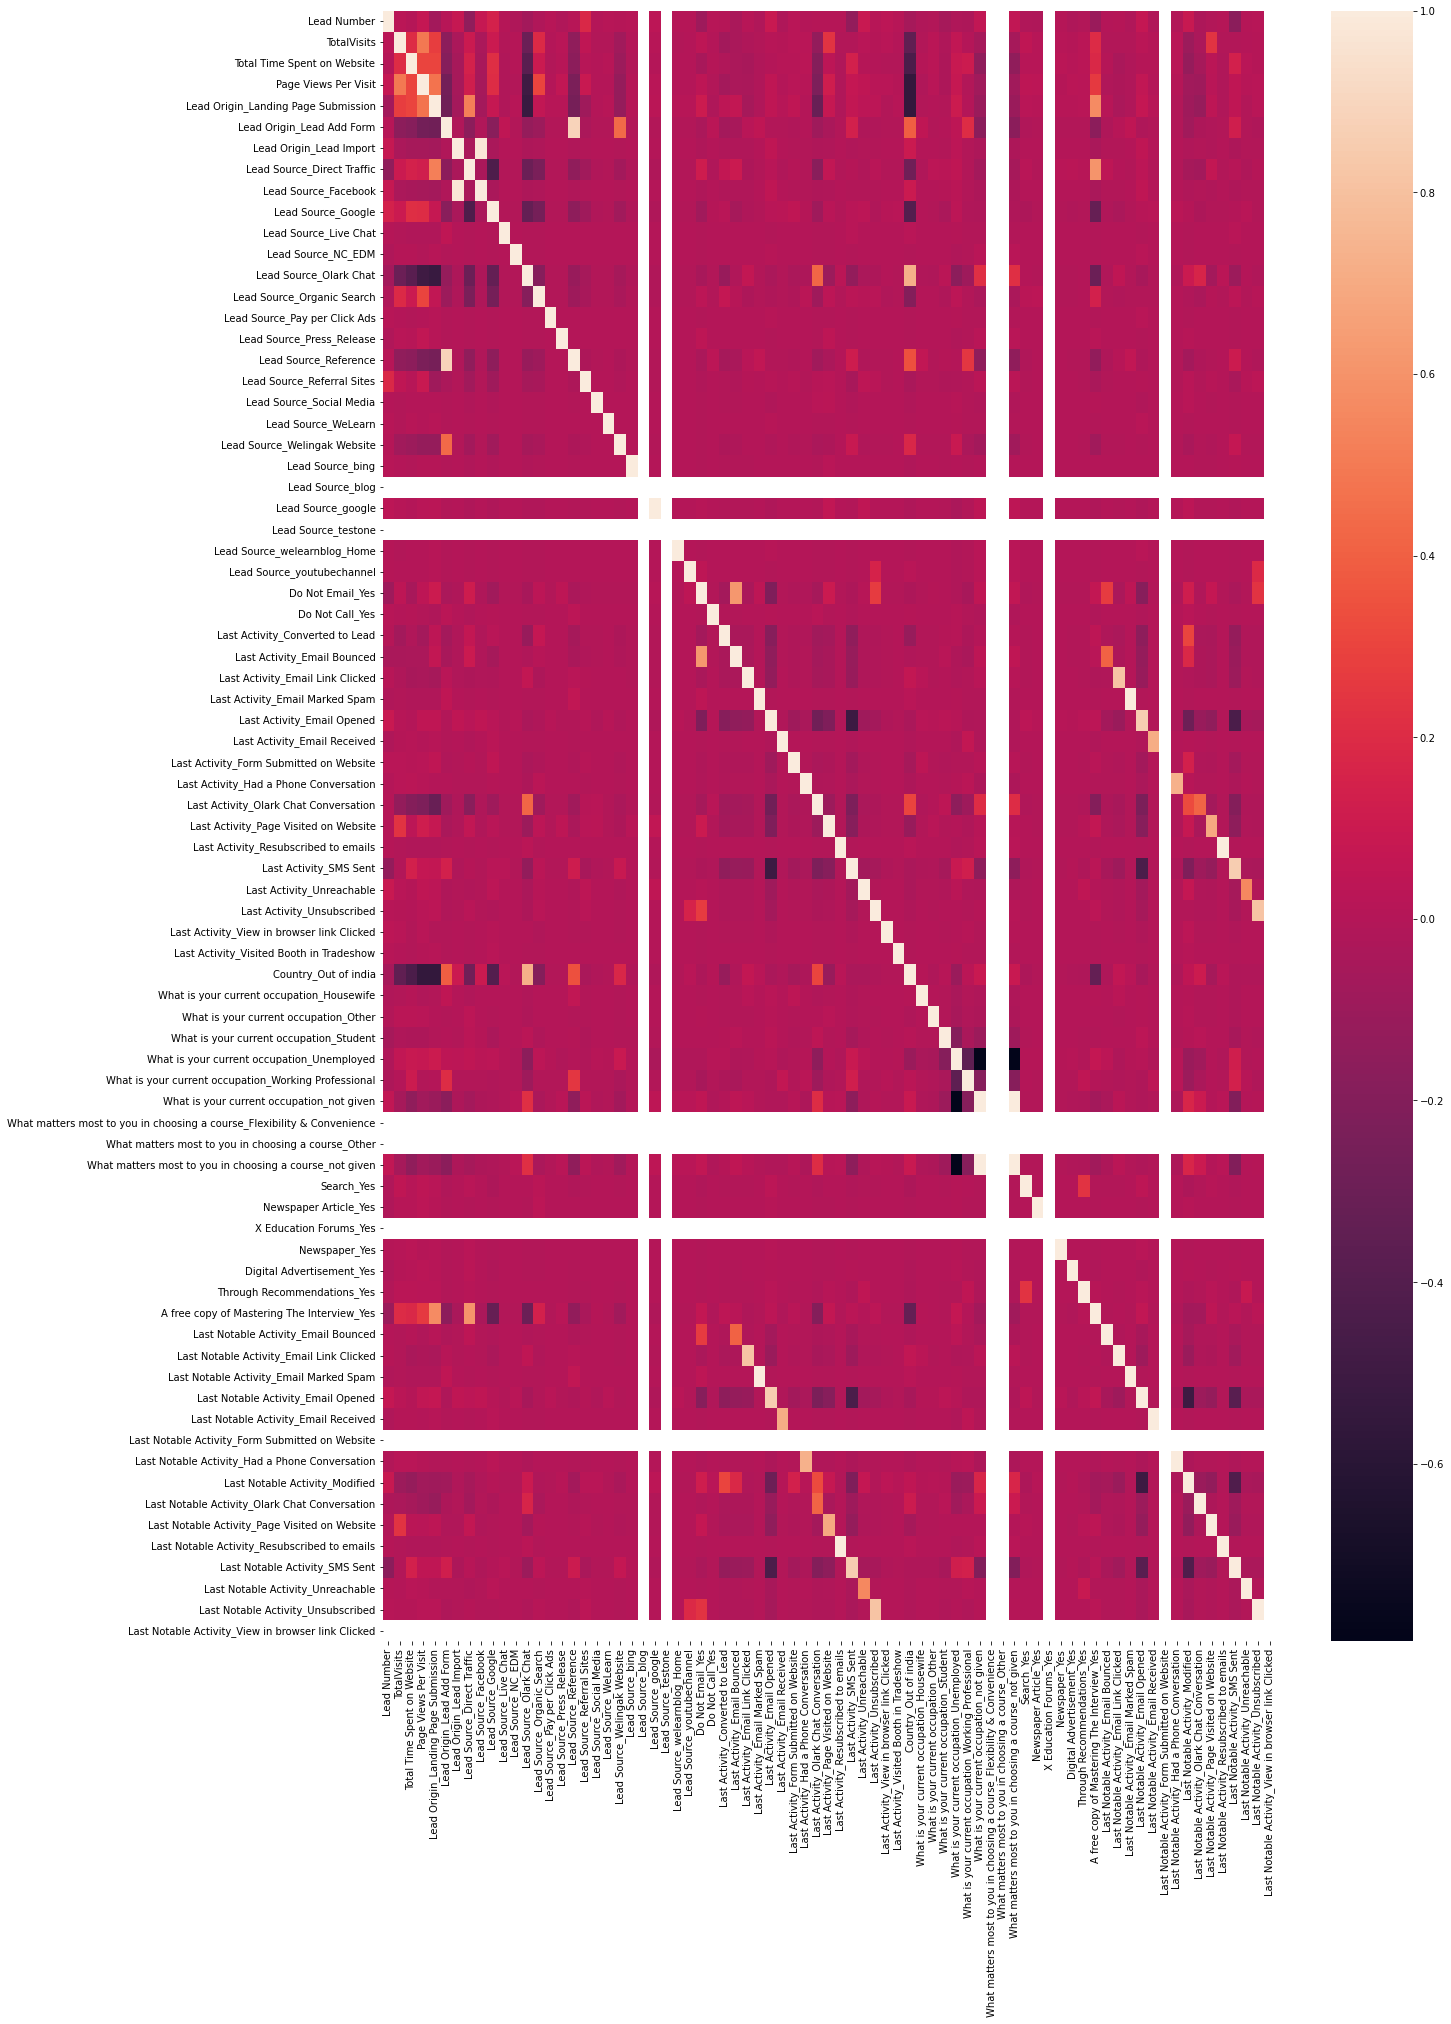

In [71]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

    -Since there are a lot of variables it is difficult to drop variable. We'll do it after RFE



### Model Building

In [72]:
import statsmodels.api as sm

In [73]:
# Logistic regression model 1
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6283
Model Family:                Binomial   Df Model:                           67
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 15 Nov 2022   Deviance:                   1.3677e+05
Time:                        18:25:04   Pearson chi2:                 6.69e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    5.579e+15   8.23e+07   6.78e+07      0.000    5.58e+15    5.58e+15
Lead Number                                                              6.022e+14   3.14e+06   1.92e+08      0.000    6.02e+14    6.02e+14
TotalVisits                                                              4.719e+15   4.96e+07   9.52e+07      0.000    4.72e+15    4.72e+15
Total Time Spent on Website                                              3.538e+15   3.97e+06   8.92e+08      0.000    3.54e+15    3.54e+15
Page Views Per Visit                                                    -2.743e+15   3.06e+07  -8.97e+07      0.000   -2.74e+15   -2.74e+15
Lead Origin_Landing Page Submission                                     -3.006e+12   2.67e+06  -1.13e+06      0.000   -3.01e+12   -3.01e+12
Lead Origin_Lead Add Form                                               -5.116e+15   6.72e+07  -7.62e+07      0.000   -5.12e+15   -5.12e+15
Lead Origin_Lead Import                                                  3.474e+15   6.89e+07   5.04e+07      0.000    3.47e+15    3.47e+15
Lead Source_Direct Traffic                                              -4.515e+15   7.76e+07  -5.82e+07      0.000   -4.51e+15   -4.51e+15
Lead Source_Facebook                                                    -8.257e+15   1.03e+08  -8.03e+07      0.000   -8.26e+15   -8.26e+15
Lead Source_Google                                                       -4.49e+15   7.76e+07  -5.79e+07      0.000   -4.49e+15   -4.49e+15
Lead Source_Live Chat                                                    6.244e+15   7.76e+07   8.05e+07      0.000    6.24e+15    6.24e+15
Lead Source_NC_EDM                                                        2.07e+14   1.03e+08   2.02e+06      0.000    2.07e+14    2.07e+14
Lead Source_Olark Chat                                                  -3.895e+15   7.75e+07  -5.02e+07      0.000   -3.89e+15   -3.89e+15
Lead Source_Organic Search                                              -4.447e+15   7.76e+07  -5.73e+07      0.000   -4.45e+15   -4.45e+15
Lead Source_Pay per Click Ads                                           -9.444e+15   1.03e+08   -9.2e+07      0.000   -9.44e+15   -9.44e+15
Lead Source_Press_Release                                               -8.011e+15   1.03e+08  -7.79e+07      0.000   -8.01e+15   -8.01e+15
Lead Source_Reference                                                    2.774e+15    3.9e+07   7.11e+07      0.000    2.77e+15    2.77e+15
Lead Source_Referral Sites                                              -4.929e+15   7.79e+07  -6.33e+07      0.000   -4.93e+15   -4.93e+15
Lea

- let's build the model using RFE

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
lr=LogisticRegression()

In [76]:
#Feature Selection Using RFE
from sklearn.feature_selection import RFE

In [77]:
#Model 1

rfe=RFE(lr,15)
rfe=rfe.fit(X_train, y_train)

In [78]:
rfe.support_

array([False,  True,  True, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False,  True, False, False])

In [79]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', False, 2),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', False, 40),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 41),
 ('Lead Source_Direct Traffic', False, 23),
 ('Lead Source_Facebook', False, 31),
 ('Lead Source_Google', False, 25),
 ('Lead Source_Live Chat', False, 48),
 ('Lead Source_NC_EDM', False, 5),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 24),
 ('Lead Source_Pay per Click Ads', False, 33),
 ('Lead Source_Press_Release', False, 50),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 19),
 ('Lead Source_Social Media', False, 27),
 ('Lead Source_WeLearn', False, 39),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 52),
 ('Lead Source_blog', False, 60),
 ('Lead Source_google', False, 28),
 ('Lead Source_testone', False, 61),
 ('Lead Source_welear

In [80]:
col = X_train.columns[rfe.support_]

In [81]:
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_not given',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [82]:
# Logistic regression model 2
logm2 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2535.8
Date:                Tue, 15 Nov 2022   Deviance:                       5071.5
Time:                        18:25:08   Pearson chi2:                 6.32e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                      -2.0908      0.089    -23.524      0.000      -2.265      -1.917
TotalVisits                                                 6.3972      2.104      3.040      0.002       2.273      10.521
Total Time Spent on Website                                 4.4079      0.166     26.581      0.000       4.083       4.733
Lead Origin_Lead Add Form                                   1.2539      1.046      1.199      0.231      -0.796       3.303
Lead Source_Olark Chat                                      1.3522      0.110     12.331      0.000       1.137       1.567
Lead Source_Reference                                       2.5550      1.069      2.390      0.017       0.459       4.651
Lead Source_Welingak Website                                4.8457      1.454      3.333      0.001       1.996       7.695
Do Not Email_Yes                                           -1.4717      0.183     -8.058      0.000      -1.830      -1.114
Last Activity_Had a Phone Conversation                      1.2979      0.892      1.455      0.146      -0.450       3.046
Last Activity_SMS Sent                                      1.3332      0.076     17.548      0.000       1.184       1.482
What is your current occupation_Housewife                  23.7296   2.67e+04      0.001      0.999   -5.23e+04    5.23e+04
What is your current occupation_Working Professional        2.6299      0.192     13.707      0.000       2.254       3.006
What matters most to you in choosing a course_not given    -1.3236      0.090    -14.632      0.000      -1.501      -1.146
Last Notable Activity_Had a Phone Conversation             22.6742   2.19e+04      0.001      0.999    -4.3e+04     4.3e+04
Last Notable Activity_Modified                             -0.8570      0.080    -10.661      0.000      -1.015      -0.699
Last Notable Activity_Unreachable                           2.2889      0.620      3.695      0.000       1.075       3.503
===========================================================================================================================
"""

In [83]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,81.86
4,Lead Source_Reference,65.82
5,Lead Source_Welingak Website,17.23
7,Last Activity_Had a Phone Conversation,2.14
12,Last Notable Activity_Had a Phone Conversation,2.13
1,Total Time Spent on Website,1.69
11,What matters most to you in choosing a course_...,1.46
13,Last Notable Activity_Modified,1.46
0,TotalVisits,1.42
8,Last Activity_SMS Sent,1.42


 - As 'Last Notable Activity_Had a Phone Conversation' has the highest P-value, let's drop the column.

In [85]:
col_1=col.drop('Last Notable Activity_Had a Phone Conversation')

In [86]:
len(col_1)

14

In [87]:
col_1

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_not given',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [88]:
# Logistic regression model 3
logm3 = sm.GLM(y_train,(sm.add_constant(X_train[col_1])), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2538.0
Date:                Tue, 15 Nov 2022   Deviance:                       5076.0
Time:                        18:25:08   Pearson chi2:                 6.32e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                      -2.0870      0.089    -23.495      0.000      -2.261      -1.913
TotalVisits                                                 6.4471      2.105      3.063      0.002       2.321      10.573
Total Time Spent on Website                                 4.4026      0.166     26.564      0.000       4.078       4.727
Lead Origin_Lead Add Form                                   1.2520      1.046      1.197      0.231      -0.799       3.303
Lead Source_Olark Chat                                      1.3518      0.110     12.325      0.000       1.137       1.567
Lead Source_Reference                                       2.5531      1.070      2.387      0.017       0.456       4.650
Lead Source_Welingak Website                                4.8465      1.454      3.332      0.001       1.996       7.697
Do Not Email_Yes                                           -1.4717      0.183     -8.057      0.000      -1.830      -1.114
Last Activity_Had a Phone Conversation                      2.3862      0.701      3.403      0.001       1.012       3.760
Last Activity_SMS Sent                                      1.3320      0.076     17.534      0.000       1.183       1.481
What is your current occupation_Housewife                  22.7332   1.62e+04      0.001      0.999   -3.17e+04    3.17e+04
What is your current occupation_Working Professional        2.6281      0.192     13.693      0.000       2.252       3.004
What matters most to you in choosing a course_not given    -1.3251      0.090    -14.645      0.000      -1.502      -1.148
Last Notable Activity_Modified                             -0.8649      0.080    -10.769      0.000      -1.022      -0.707
Last Notable Activity_Unreachable                           2.2863      0.620      3.690      0.000       1.072       3.500
===========================================================================================================================
"""

In [89]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_1].values, i) for i in range(X_train[col_1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,81.86
4,Lead Source_Reference,65.82
5,Lead Source_Welingak Website,17.23
1,Total Time Spent on Website,1.69
11,What matters most to you in choosing a course_...,1.46
12,Last Notable Activity_Modified,1.46
0,TotalVisits,1.42
8,Last Activity_SMS Sent,1.42
3,Lead Source_Olark Chat,1.30
10,What is your current occupation_Working Profes...,1.20


    - As 'What is your current occupation_Housewife' has the highest P-value, let's drop it.

In [90]:
col_2=col_1.drop('What is your current occupation_Housewife')

In [91]:
# Logistic regression model 4
logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col_2])), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2543.1
Date:                Tue, 15 Nov 2022   Deviance:                       5086.1
Time:                        18:25:08   Pearson chi2:                 6.33e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                      -2.0813      0.089    -23.470      0.000      -2.255      -1.908
TotalVisits                                                 6.3880      2.100      3.041      0.002       2.271      10.504
Total Time Spent on Website                                 4.4056      0.166     26.595      0.000       4.081       4.730
Lead Origin_Lead Add Form                                   1.2481      1.046      1.193      0.233      -0.802       3.298
Lead Source_Olark Chat                                      1.3472      0.110     12.297      0.000       1.132       1.562
Lead Source_Reference                                       2.5786      1.069      2.412      0.016       0.483       4.674
Lead Source_Welingak Website                                4.8456      1.454      3.333      0.001       1.996       7.695
Do Not Email_Yes                                           -1.4754      0.183     -8.077      0.000      -1.833      -1.117
Last Activity_Had a Phone Conversation                      2.3787      0.701      3.393      0.001       1.005       3.753
Last Activity_SMS Sent                                      1.3268      0.076     17.474      0.000       1.178       1.476
What is your current occupation_Working Professional        2.6218      0.192     13.663      0.000       2.246       2.998
What matters most to you in choosing a course_not given    -1.3292      0.090    -14.697      0.000      -1.506      -1.152
Last Notable Activity_Modified                             -0.8594      0.080    -10.720      0.000      -1.016      -0.702
Last Notable Activity_Unreachable                           2.2839      0.620      3.685      0.000       1.069       3.498
===========================================================================================================================
"""

In [92]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_2].values, i) for i in range(X_train[col_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,81.86
4,Lead Source_Reference,65.81
5,Lead Source_Welingak Website,17.23
1,Total Time Spent on Website,1.69
10,What matters most to you in choosing a course_...,1.46
11,Last Notable Activity_Modified,1.46
0,TotalVisits,1.42
8,Last Activity_SMS Sent,1.42
3,Lead Source_Olark Chat,1.30
9,What is your current occupation_Working Profes...,1.20


    - As 'Lead Origin_Lead Add Form' has the highest P-value, let's drop it.

In [93]:
col_3=col_2.drop('Lead Origin_Lead Add Form')

In [94]:
# Logistic regression model 5
logm5 = sm.GLM(y_train,(sm.add_constant(X_train[col_3])), family = sm.families.Binomial())
res=logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2543.8
Date:                Tue, 15 Nov 2022   Deviance:                       5087.6
Time:                        18:25:08   Pearson chi2:                 6.33e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
const                                                      -2.0780      0.089    -23.455      0.000      -2.252      -1.904
TotalVisits                                                 6.3783      2.099      3.039      0.002       2.265      10.492
Total Time Spent on Website                                 4.4040      0.166     26.587      0.000       4.079       4.729
Lead Source_Olark Chat                                      1.3472      0.110     12.298      0.000       1.132       1.562
Lead Source_Reference                                       3.8243      0.233     16.387      0.000       3.367       4.282
Lead Source_Welingak Website                                6.0912      1.013      6.015      0.000       4.106       8.076
Do Not Email_Yes                                           -1.4767      0.183     -8.085      0.000      -1.835      -1.119
Last Activity_Had a Phone Conversation                      2.3771      0.701      3.390      0.001       1.003       3.751
Last Activity_SMS Sent                                      1.3259      0.076     17.464      0.000       1.177       1.475
What is your current occupation_Working Professional        2.6199      0.192     13.653      0.000       2.244       2.996
What matters most to you in choosing a course_not given    -1.3311      0.090    -14.722      0.000      -1.508      -1.154
Last Notable Activity_Modified                             -0.8608      0.080    -10.740      0.000      -1.018      -0.704
Last Notable Activity_Unreachable                           2.2819      0.620      3.682      0.000       1.067       3.497
===========================================================================================================================
"""

In [95]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_3].values, i) for i in range(X_train[col_3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,1.69
9,What matters most to you in choosing a course_...,1.46
10,Last Notable Activity_Modified,1.46
0,TotalVisits,1.42
7,Last Activity_SMS Sent,1.42
2,Lead Source_Olark Chat,1.30
8,What is your current occupation_Working Profes...,1.20
3,Lead Source_Reference,1.15
5,Do Not Email_Yes,1.10
4,Lead Source_Welingak Website,1.03


- The above model-5 has the minimum p-values & very accecptable VIF values. This model performance seems good. Let's calculate the metrics below.

###### Predicting the training set values

In [96]:
X_train_sm=sm.add_constant(X_train)

In [97]:
y_train_pred=res.predict(sm.add_constant(X_train[col_3]))
y_train_pred[:10]

7724    0.043768
6670    0.138094
3248    0.996310
8902    0.743944
7268    0.907410
1280    0.099077
2644    0.660294
6261    0.122036
6569    0.349457
7058    0.020794
dtype: float64

In [98]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.04376773, 0.13809436, 0.99630958, 0.74394368, 0.90741017,
       0.0990769 , 0.66029391, 0.12203553, 0.34945726, 0.02079359])

In [99]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final=pd.DataFrame({'Converted':y_train.values, 'Conversion Probability':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion Probability
0,0,0.043768
1,0,0.138094
2,1,0.996310
3,1,0.743944
4,1,0.907410


In [100]:
#let us keep the cutoff probabilty value as 0.5 & add the predicted colum to the dataframe
y_train_pred_final['Predicted']=y_train_pred_final['Conversion Probability'].map(lambda x: 0 if x< 0.5 else 1)

In [101]:
y_train_pred_final.head()

,Converted,Conversion Probability,Predicted
0,0,0.043768,0
1,0,0.138094,0
2,1,0.996310,1
3,1,0.743944,1
4,1,0.907410,1


In [102]:

# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [103]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3544,  432],
       [ 736, 1639]])

In [104]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8160919540229885

The model has acheived an accuracy of 81.6%

## Metrics beyond simply accuracy

In [105]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [106]:
#sensitivity

TP/(TP+FN)

0.6901052631578948

In [107]:
# Calculating the specificity
TN/(TN+FP)

0.8913480885311871

#### WIth the obtained cutoff we got an accuracy of 81%, Specificity of 89% & Sensitivity of 69%

##### Recall
TP / TP + FN

In [108]:
TP/(TP+FN)

0.6901052631578948

##### Precision
TP / TP + FP

In [109]:
##### Precision
TP / (TP + FP)

0.791405118300338

#### With the current cut off of 0.35, we have got the Recall at 69% and the precision as 79%

#### Let us plot the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [110]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [111]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final['Conversion Probability'], drop_intermediate = False )

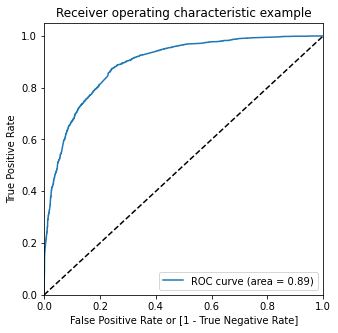

In [112]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final['Conversion Probability'])

The are under the RoC curve is 0.89 which is a good value.

In [113]:
### Finding Optimal Cutoff Point

## Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Conversion Probability'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.043768,0,1,0,0,0,0,0,0,0,0,0
1,0,0.138094,0,1,1,0,0,0,0,0,0,0,0
2,1,0.996310,1,1,1,1,1,1,1,1,1,1,1
3,1,0.743944,1,1,1,1,1,1,1,1,1,0,0
4,1,0.907410,1,1,1,1,1,1,1,1,1,1,1


In [114]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.373957  1.000000  0.000000
0.1   0.1  0.626201  0.974737  0.418008
0.2   0.2  0.769800  0.911579  0.685111
0.3   0.3  0.800819  0.865263  0.762324
0.4   0.4  0.812628  0.765474  0.840795
0.5   0.5  0.816092  0.690105  0.891348
0.6   0.6  0.809321  0.619368  0.922787
0.7   0.7  0.786175  0.509895  0.951207
0.8   0.8  0.764761  0.422737  0.969064
0.9   0.9  0.725555  0.286737  0.987676


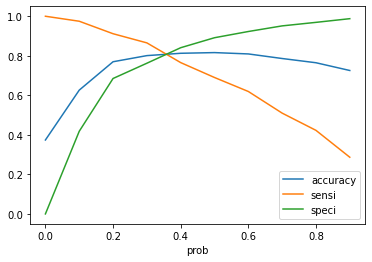

In [115]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- from the above we can observe that 0.35 is the point where all metrics meet. 0.35 is the optimal probability.

In [116]:
y_train_pred_final['final_prediction']= y_train_pred_final['Conversion Probability'].map(lambda x: 1 if x > 0.35 else 0)

In [117]:
y_train_pred_final.head()

,Converted,Conversion Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction
0,0,0.043768,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.138094,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.996310,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.743944,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.907410,1,1,1,1,1,1,1,1,1,1,1,1


In [118]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_prediction)
confusion

array([[3236,  740],
       [ 482, 1893]])

In [119]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_prediction)

0.807589356006928

The model has acheived an accuracy of 80.7%

#### Metric beyond Accuracy

In [120]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [121]:
# Calculating the specificity
TN/(TN+FP)

0.8138832997987927

In [122]:
#sensitivity

TP/(TP+FN)

0.7970526315789473

#### WIth the obtained cutoff we got an accuracy of 80%, Specificity of 81% & Sensitivity of 79.7%

#### Recall & Precision value calculations

In [123]:
##### Recall
#TP / TP + FN

TP/(TP+FN)

0.7970526315789473

In [124]:
##### Precision
#TP / TP + FP

##### Precision
TP / (TP + FP)

0.7189517660463349

#### With the current cut off of 0.35, we have got the Recall at 80% and the precision as 72%

### Prediction on Test Set

In [125]:
X_test[['Lead Number','TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.transform(X_test[['Lead Number','TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [126]:
X_test[['Lead Number','TotalVisits','Total Time Spent on Website','Page Views Per Visit']].head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit
3221,0.612831,0.007968,0.405981,0.018182
1427,0.808671,0.011952,0.241504,0.027273
8880,0.032854,0.007968,0.512007,0.036364
7010,0.201028,0.000000,0.000000,0.000000
702,0.908377,0.019920,0.052107,0.090909


In [127]:
X_test=X_test[col_3]

In [128]:
X_test_sm=sm.add_constant(X_test)

In [129]:
y_test_pred= res.predict(X_test_sm)

In [130]:
y_test_pred[:10]

3221    0.439199
1427    0.041882
8880    0.931171
7010    0.112851
702     0.039040
6460    0.937761
6340    0.051040
2811    0.044384
1854    0.080285
4184    0.325014
dtype: float64

In [131]:
y_test_pred=y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.4391991 , 0.04188225, 0.9311715 , 0.11285054, 0.03903967,
       0.93776052, 0.05103952, 0.04438381, 0.08028544, 0.32501394])

In [132]:
# Data frame with given convertion rate and probablity of predicted ones
y_test_pred_final=pd.DataFrame({'Converted':y_test.values, 'Conversion_prob':y_test_pred})
y_test_pred_final.head()

,Converted,Conversion_prob
0,1,0.439199
1,0,0.041882
2,1,0.931171
3,0,0.112851
4,0,0.039040


In [133]:
# Use 0.35 as the cutoff & predict the outcome. 
y_test_pred_final['prediction']=y_test_pred_final.Conversion_prob.map(lambda x: 1 if x> 0.35 else 0)

In [134]:
y_test_pred_final.head()

,Converted,Conversion_prob,prediction
0,1,0.439199,1
1,0,0.041882,0
2,1,0.931171,1
3,0,0.112851,0
4,0,0.039040,0


In [135]:
#confusion matrix.

confusion=metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.prediction)
confusion

array([[1363,  300],
       [ 227,  833]])

In [136]:
accuracy=metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.prediction)
accuracy

0.8064634594197576

In [137]:
## Metric beyond Accuracy
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [138]:
# Calculating the specificity
TN/(TN+FP)

0.8196031268791341

In [139]:
#sensitivity

TP/(TP+FN)

0.7858490566037736

### for the cut off of 0.35 obtained from the test data has given us the results of Accuracy - 80%, Specificity- 82% & Sensitivity - 78.5%

### Precision & Recall values

In [140]:
##### Precision
TP / (TP + FP)

0.735216240070609

In [141]:
#Recall

TP/(TP+FN)

0.7858490566037736

### for the cut off of 0.35 obtained from the test data has given us the results of Precision - 73.5% & Recall - 78.5%

#### Precision - Recall Tradeoff

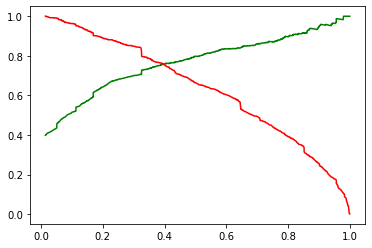

In [142]:
# Precision and recall tradeoff

from sklearn.metrics import precision_recall_curve

y_test_pred_final.Converted, y_test_pred_final['Conversion_prob']

p, r, thresholds = precision_recall_curve(y_test_pred_final.Converted, y_test_pred_final['Conversion_prob'])

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

From the above, it is clearly seen that the trade off is happening @ 0.4 

Let us try evaluating the model performance @ 0.4 and see if we can get some better results

#### train data model performance evaluation with 0.4 as a cut-off

In [143]:
y_train_pred_final['final_prediction']= y_train_pred_final['Conversion Probability'].map(lambda x: 1 if x > 0.4 else 0)

In [144]:
y_train_pred_final.head()

,Converted,Conversion Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction
0,0,0.043768,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.138094,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.996310,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.743944,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.907410,1,1,1,1,1,1,1,1,1,1,1,1


In [145]:
confusion=metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final['final_prediction'])

In [146]:
confusion

array([[3343,  633],
       [ 557, 1818]])

In [147]:
accuracy=metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final['final_prediction'])
accuracy

0.812627932609038

In [148]:
## Metric beyond Accuracy
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [149]:
# Calculating the specificity
TN/(TN+FP)

0.84079476861167

In [150]:
#sensitivity

TP/(TP+FN)

0.7654736842105263

### for the cut off of 0.4 (training set)  we have obtained from the results of Accuracy - 81%, Specificity- 84% & Sensitivity - 76.5%

Precision & Recall calculations

In [151]:
##### Precision
TP / (TP + FP)

0.7417380660954712

In [152]:
#Recall

TP/(TP+FN)

0.7654736842105263

### for the cut off of 0.4 obtained from the training model has given us the results of Precision - 74% & Recall - 76.5%

#### Test data model performance evaluation with 0.4 as a cut-off

In [153]:
# Use 0.40 as the cutoff & predict the outcome. 
y_test_pred_final['new_prediction']=y_test_pred_final.Conversion_prob.map(lambda x: 1 if x> 0.40 else 0)

In [154]:
y_test_pred_final.head()

,Converted,Conversion_prob,prediction,new_prediction
0,1,0.439199,1,1
1,0,0.041882,0,0
2,1,0.931171,1,1
3,0,0.112851,0,0
4,0,0.039040,0,0


In [155]:
confusion=metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final['new_prediction'])
confusion

array([[1411,  252],
       [ 262,  798]])

In [156]:
## Metric beyond Accuracy
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [157]:
## Acuuracy Score

Accuracy=metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final['new_prediction'])

In [158]:
Accuracy

0.8112376055820786

In [159]:
# Calculating the specificity
TN/(TN+FP)

0.8484666265784726

In [160]:
#sensitivity

TP/(TP+FN)

0.7528301886792453

### for the cut off of 0.4 (Test data set)  we have obtained from the results of Accuracy - 81%, Specificity- 84% & Sensitivity - 75.2%

#### Precision & Recall calculations

In [161]:
##### Precision
TP / (TP + FP)

0.76

In [162]:
#Recall

TP/(TP+FN)

0.7528301886792453

#### for the cut off of 0.4 obtained from the training model has given us the results of Precision - 76% & Recall - 75.2%

## Generation of the Score Column

In [163]:
#Create a dataframe using the columns included in the model 5.
df_model_scores=df_model[col_3]

In [164]:
#Predict the probabilities of conversion using the model 5. 
Lead_score=res.predict(sm.add_constant(df_model_scores))

In [165]:
Lead_score.head()

0    0.169153
1    1.000000
2    1.000000
3    1.000000
4    1.000000
dtype: float64

In [166]:
#combine the predicted values and the dataframe. 
df_score=pd.concat([df_model_scores,Lead_score], axis=1)

In [167]:
#Rename the column to Lead_score
df_score=df_score.rename(columns=lambda x: 'Lead_score' if x==0 else x)

In [168]:
# Converting the probabilities into scores by multipying it with 100. 
df_score.Lead_score=df_score.Lead_score*100

In [169]:
df_score.head()

,TotalVisits,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,What matters most to you in choosing a course_not given,Last Notable Activity_Modified,Last Notable Activity_Unreachable,Lead_score
0,0.0,0,1,0,0,0,0,0,0,0,1,0,16.915305
1,5.0,674,0,0,0,0,0,0,0,0,0,0,100.000000
2,2.0,1532,0,0,0,0,0,0,0,0,0,0,100.000000
3,1.0,305,0,0,0,0,0,0,0,0,1,0,100.000000
4,2.0,1428,0,0,0,0,0,0,0,0,1,0,100.000000


### __Conclusion

for this particular problem - Recall is the important metric to evaluate the model performance. From the above we can confirm that with the probability cut off of 0.35 gives the best performance. ___

## Summary

It was found that the variables that mattered the most in the potential buyers are (In descending order) :

1)The total time spend on the Website.

2)Total number of visits.

3)When the lead source was:
    a. References
    b. Olark chat conversation
    c. Organic search
    d. Welingak website
    
4) When the last activity was:
    a. SMS
    b. Had a Phone Conversation
    
5) When their current occupation is as a working professional.


Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.